# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # считаем функцию потерь по формуле выше
        Q = sum(((np.dot(X,w)) - y) **  2) / len(y)
        return Q

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # считаем значение вектора градиента по формуле выше
        grad = np.dot(X.T, (np.dot(X, w)) - y) * 2 / len(y)
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.


In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # в этом списке будут храниться веса, в том числе и начальные
    res = [w_init]
    # считаем для каждой итерации значение вектора весов и добавляем в список
    for i in range(n_iterations):
        grad = res[i] - lr * loss.calc_grad(X, y, res[i])
        res.append(grad)

    return np.array(res)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045028
0.8670644395649499


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

In [ ]:
# создадим список из четырех значений шага, которые будем смотреть
lr = np.array([0.0001, 0.001, 0.01, 0.1])

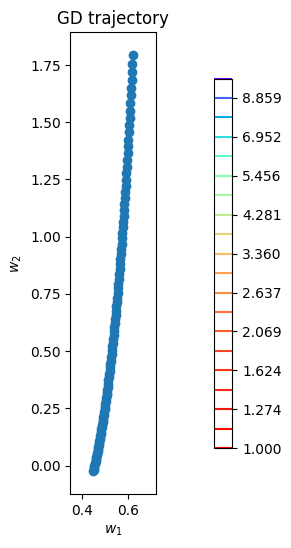

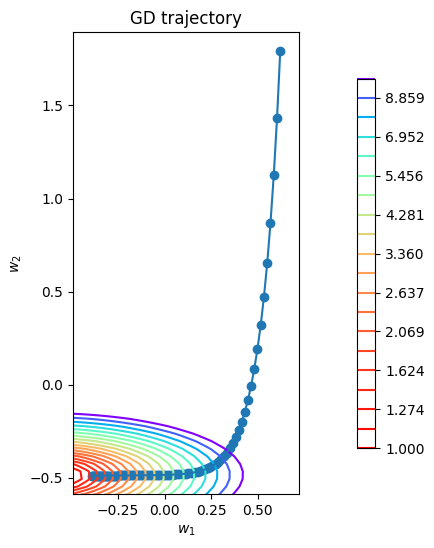

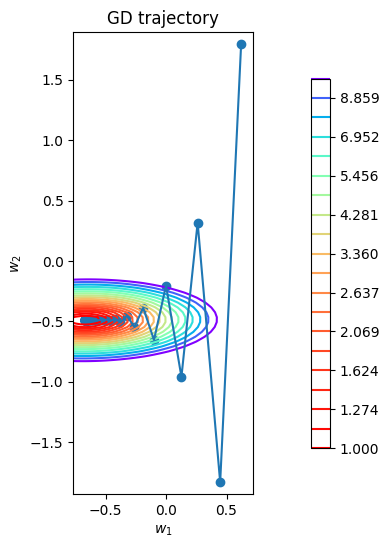

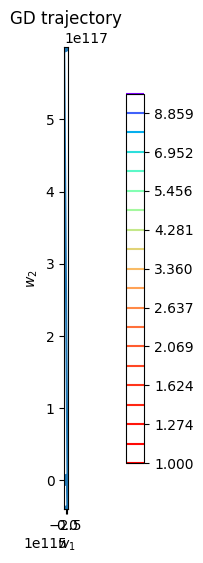

In [ ]:
# рисуем траекторию градиентного спуска для каждой длины шага
for l in lr:
    w_list = gradient_descent(w_init, X, y, loss, l, 100)
    plot_gd(w_list, X, y, loss)

Рассмтотрим каждый из получившихся графиков отдельно.

1) **Шаг 0.0001**

С таким маленьким шагом мы не успеваем дойти до минимума, поэтому этот вариант явно не оптимальный.

2) **Шаг 0.001**

Мы начинаем не достаточно далеко, а затем приходим близко к минимуму, но, к сожалению все еще не доходим до него. Поэтому этот вариант тоже не самый лучший.

3) **Шаг 0.01**

Пожалуй, самая лучшая картинка! Хотя в начале кривую немного шатает, видно, что в конце он все равно сходится к минимуму, а это главное в градиентном спуске. Самый оптимальный вариант.

4) **Шаг 0.1**

Просто кошмар)) Шаг получился слишком большим, мы дошли и перешли минимум, поэтому получилась такая страшнющая картинка

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # список весов
    res = [w_init]
    # для каждой интерации
    for i in range(n_iterations):
        # выбираем случайные семлпы по размеру батча
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        # считаем на них градиент
        grad = res[i] - lr * loss.calc_grad(batch, y[batch_indices], res[i])
        res.append(grad)

    return np.array(res)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [ ]:
# задаем возможные значения шагов и батчей
lrs = np.array([0.0001, 0.001, 0.01, 0.1])
batch_sizes = np.array([10, 50, 100, 150])

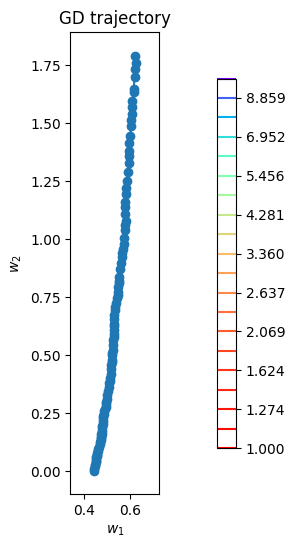

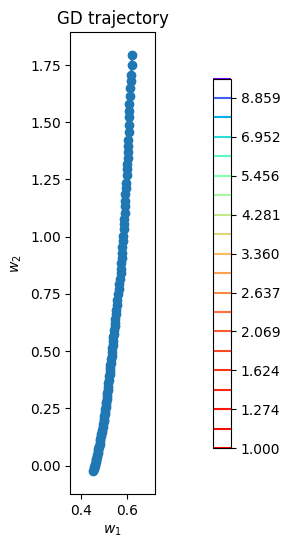

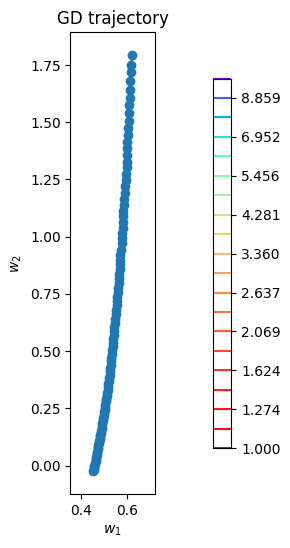

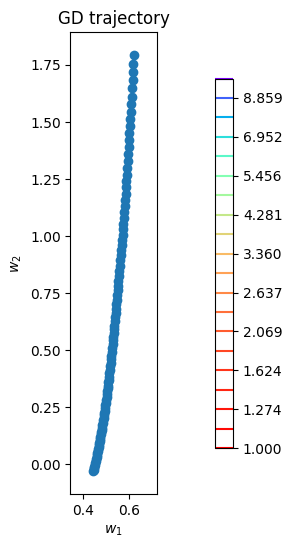

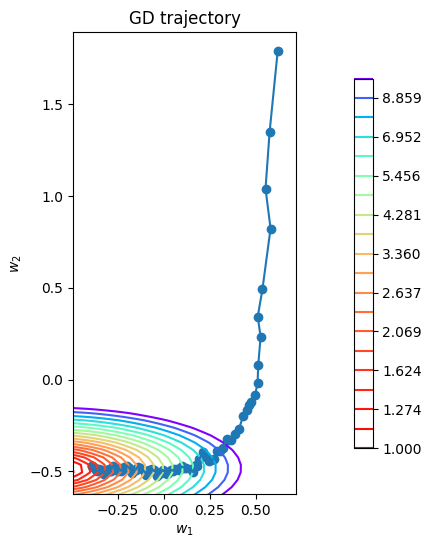

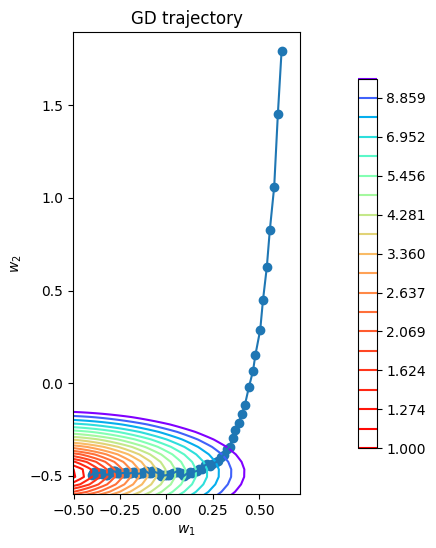

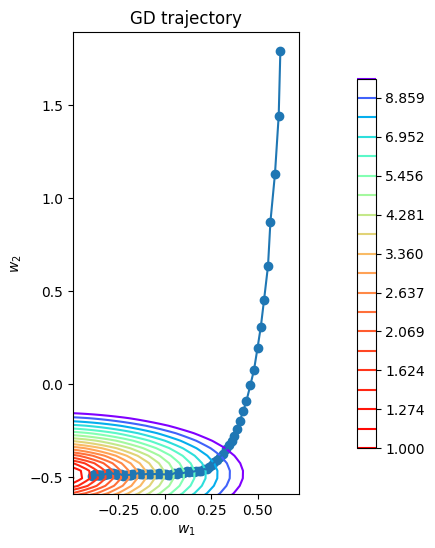

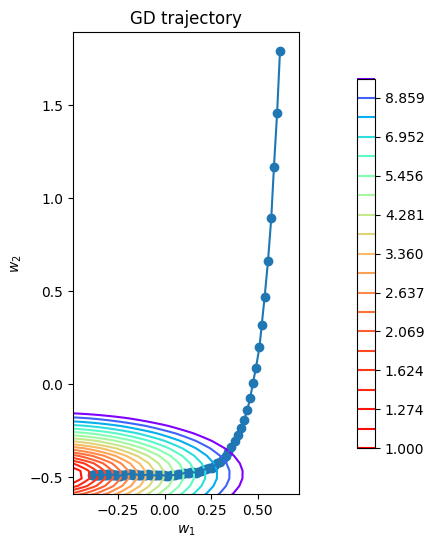

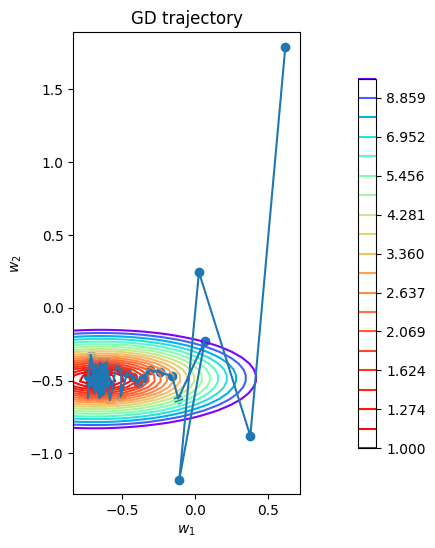

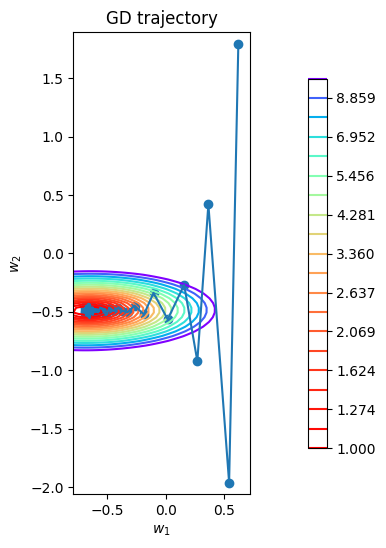

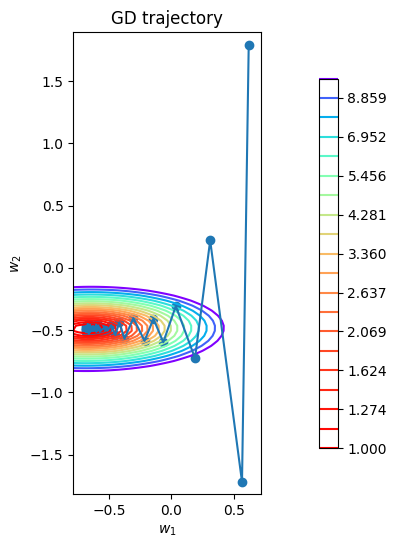

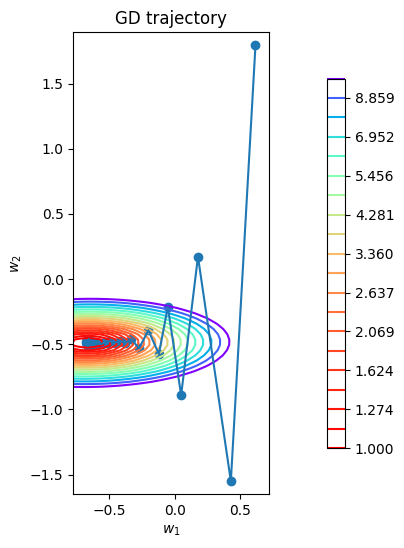

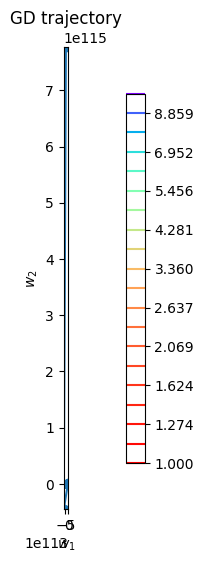

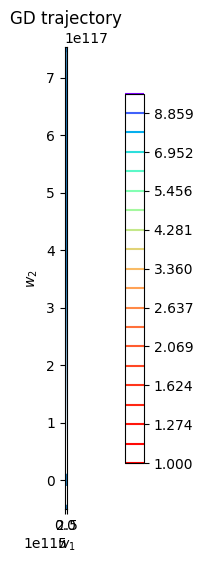

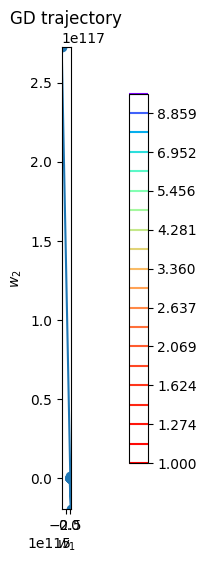

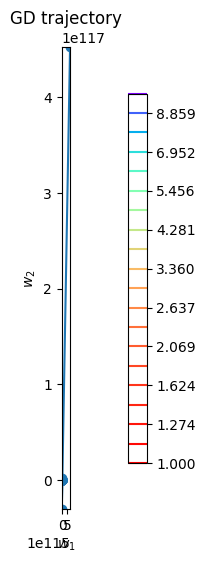

In [ ]:
# проходимся по всем заданным значениям и рисуем графики
for lr in lrs:
    for batch_size in batch_sizes:
        w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 100)
        plot_gd(w_list, X, y, loss)

Как было видно из предыдущего задания, размер шага сильно влияет на то, как ведет себя градиентный спуск. При значениях 0.0001 или 0.1 картинка была ужасной. При изменения размера батча в этих случаях ничего особо не меняется: все так же мы наблюдаем что-то непонятное то недоходящее до минимума, то переходящее его.

При значении шага в 0.001 мы снова не доходим до минимума. Но можно заметить, как размер батча влияет на траекторию спуска. При маленьких размерах кривую сильно мотает: видимо, значение градиента для маленькой порции объектов из выборки в некоторых случаях сильно отличается от значения градиента для всех объектов. При больших размерах батча мы видим гораздо более плавный спуск траектории.

Наконец, при самом оптимальном значении шага в 0.01 мы видим сильные колебания не только в начале, но и в конце траектории спуска. Он доходит до минимума, но потом сильно кружится там, что не приводит к хорошим результатам. При увеличении размера мы по-прежнему наблюдаем большую жирную точку в минимуме, поэтому погрешность остается. Оставшиеся два графика с размерами батчей 100 и 150 (особенно!) выглядят гораздо лучше: мы доходим до минимума и колеблемся там в пределах небольшой погрешности. Получается, что наиболее правильным и оптимальным набором параметров является значение шага в 0.01 и значения батча в 150 (но это, правда, половина от выборки, поэтому не уверена, насколько здесь можно говорить о сильном ускорении работы??).

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # записываем сюда веса
    res = [w_init]
    # задаем s0
    s0 = 1
    # для каждой итерации
    for i in range(n_iterations):
        # определяем размер шага
        step = lr * ((s0 / (s0 + i))) ** p
        # определяем количество сэмплов и считаем градиент
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        grad = res[i] - step * loss.calc_grad(batch, y[batch_indices], res[i])
        res.append(grad)

    return np.array(res)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

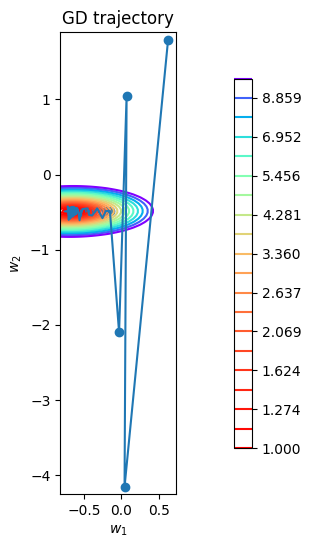

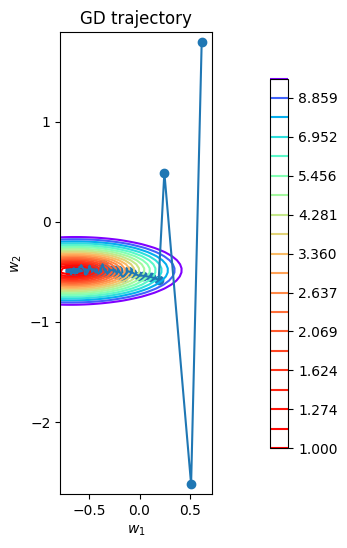

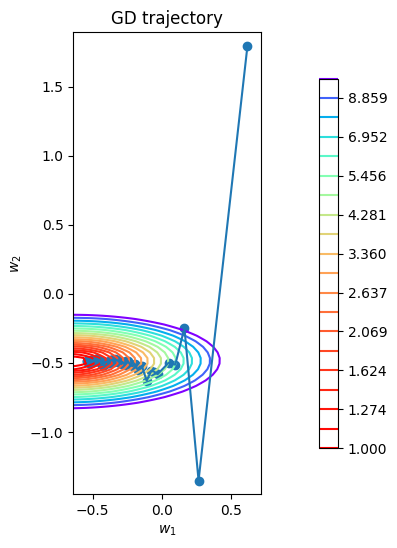

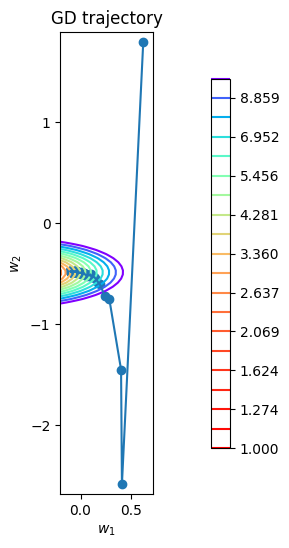

In [ ]:
# беоем значения параметра p от 0.1 до 1
ps = np.array([0.1, 0.3, 0.6, 1])
# рисуем графики с настроенными заранее параметрами lr и batch_size
for p in ps:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 100)
    plot_gd(w_list, X, y, loss)

Рассмотрим каждое значение параметра р отдельно.

1) **0.1**

Как мы видим, в начале длина шага получается достаточно большой, из-за чего градиент быстро доходит до "околоминимальной" зоны. Поэтому под конец из-за не слишком маленького шага его сильно мотает в той самой зоне (видим большую жирную область), что может привести к сильной погрешности.

2) **0.3**

При этом значении мы наблюдаем картинку получше: размер шага уменьшается сильнее, чем в первом случае, потому мы более медленно и постепенно достигаем нужного минимума, не колеблясь сильно в "околоминмальной зоне".

3) **0.6**

Здесь мы видим, что градиентный спуск вовсе не доходит до самой "околоминимальной зоны". Шаг уменьшается слишком быстро, чтобы достичь значения минимума.

4) **1**

То же самое, что и при значении в 0.6, только еще более скорое уменьшение, а, значит, более далекое финальное значение. Мы совсем много не доходим до минимума.

Из всех проанализированных значений получается, что наиболее оптимальным является 0.3.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [ ]:
# список весов для обычного градиентного спуска
w_list_gd = gradient_descent(w_init, X, y, loss, 0.01, 100)
# здесь будут номера итераций
ais_gd = []
# здесь будут значений лосса
losses_gd = []
# считаем для каждого набора весов лосс и добавляем все нужное в списки
for i in range(len(w_list_gd)):
    los = loss.calc_loss(X, y, w_list_gd[i])
    ais_gd.append(i)
    losses_gd.append(los)

# то же самое проделываем со стохастическим градиентными спуском
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.3, 100)
ais_sgd = []
losses_sgd = []
for i in range(len(w_list_sgd)):
    los = loss.calc_loss(X, y, w_list_sgd[i])
    ais_sgd.append(i)
    losses_sgd.append(los)

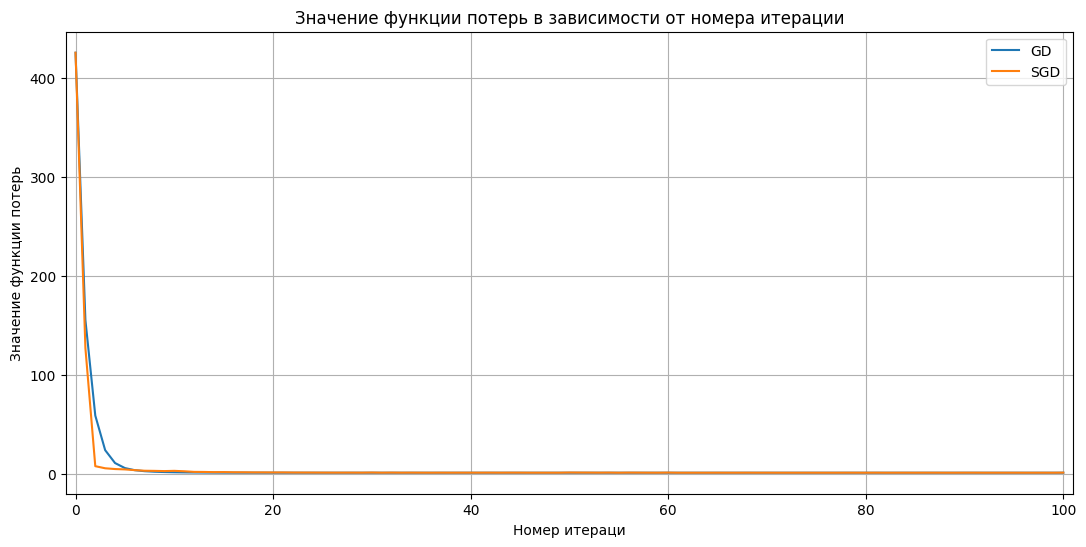

In [ ]:
# рисуем график!
plt.figure(figsize=(13, 6))
plt.plot(ais_gd, losses_gd, label="GD")
plt.plot(ais_sgd, losses_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, 101))
plt.legend()
plt.xlabel("Номер итераци")
plt.ylabel(r"Значение функции потерь")
plt.grid()
plt.show()

Для стохастического градиентного спуска я выбрала наиболее оптимальные получившиеся параметры: р равное 0.3 и lr равное 0.01. При таких параметрах можно видеть, что стохастический градиентный спуск немного раньше (но совсем на чуть-чуть) преходит к более маленькому лоссу. Причем это происходит чуть ли не на 3-4 итерации. Но обычный градиентный спуск приходит к таким же значениям в крайнем случай на 10 итерации. Поэтому явного преимущества стохастичекого спуска этот график не иллюстрирует

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # задаем количество признаков
        n_features = X.shape[1]
        # создаем случайные начальные веса
        w_init = np.random.uniform(-2, 2, (n_features))
        # считаем градиентный спуск
        grad = gradient_descent(w_init, X, y, self.loss, self.lr)
        # записываем финальные веса
        w_last = grad[-1]

        self.w = w_last

        # return w_last
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # получаем "предсказания" по нашим весам и выборке
        pred = np.dot(X, self.w)

        return pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
# во-первых, уберем столбец индекса, он не несет важной информации
X_raw_ind = X_raw.drop(['index'], axis=1)
X_raw_ind.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27


In [ ]:
# посмотрим, есть ли пропуски в данных
sum(X_raw_ind.isna().sum())

51

In [ ]:
# заполняем пропуски!
# ищем индексы столбцов, где есть пропуски
inds = (X_raw_ind.isna().sum() != 0).tolist()
indexes = []
for i in range(len(inds)):
    if (inds[i] == True):
        indexes.append(i)
# здесь все столбцы, где есть пропуски
X_raw_ind[indexes].isna().sum()

1     37
5      2
18     4
19     4
21     2
22     2
dtype: int64

In [ ]:
# в пятом столбце категориальная переменная :( заполним пропуски наиболее частым значением -- four
X_raw_ind[5].value_counts()

5
four    113
two      86
Name: count, dtype: int64

In [ ]:
# заполняем пропуски
# для вещественных признаков -- медиана
# для рассмотренного выше -- four
for index in indexes:
    try:
        X_raw_ind[index].fillna(X_raw_ind[index].mean(), inplace=True)
    except:
        X_raw_ind[index].fillna('four', inplace=True)
# больше пропусков нет!
sum(X_raw_ind.isna().sum())

0

In [ ]:
# смотрим, какие типы есть в данных
X_raw_ind.dtypes

0       int64
1     float64
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18    float64
19    float64
20    float64
21    float64
22    float64
23      int64
24      int64
dtype: object

In [ ]:
# кодируем категориальные признаки
X_raw_dum = pd.get_dummies(X_raw_ind)
X_raw_dum

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
197,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
198,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
199,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
import numpy as np

In [ ]:
# разделяем выборку на трейновую и тестовую
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X_raw_dum), y, test_size=0.3,
                                                    random_state=np.random.seed(22))

In [ ]:
# нормализуем числовые признаки
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# сначала делаем fit_transform на трейне
inds = X_raw_dum.select_dtypes(['float', 'int']).shape[1]
r = range(0, inds)
X_train_scaled = scaler.fit_transform(np.array(pd.DataFrame(X_train)[r]))
X_obj =  pd.DataFrame(X_train).drop(pd.DataFrame(X_train).columns[r], axis = 1)
X_obj = np.array(X_obj.astype(int))
X_train = np.concatenate((X_train_scaled, X_obj), axis=1)

# затем просто transform на тесте
X_test_scaled = scaler.transform(np.array(pd.DataFrame(X_test)[r]))
X_obj_t =  pd.DataFrame(X_test).drop(pd.DataFrame(X_test).columns[r], axis = 1)
X_obj_t = np.array(X_obj_t.astype(int))
X_test = np.concatenate((X_test_scaled, X_obj_t), axis=1)


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
# обучаем линейную регрессию на трейне
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
# считаем ошибки на трейне и тесте
from sklearn.metrics import mean_squared_error

y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2062659.3872038585
Ошибка на тестовой выборке: 5121666.9343493385


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # убираем последний вес
        ws = w[:-1]
        # считаем лосс по формуле выше
        lambdaw = self.coef * sum(ws**2)
        Q = (sum(((np.dot(X,w)) - y) **  2) / len(y)) + lambdaw
        return Q

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # считаем градиент по формуле выше
        w[-1] = 0
        grad = (np.dot(X.T, (np.dot(X, w)) - y) * 2 / len(y)) + 2*self.coef*w
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
# задаем параметр 0.00001 (иначе не будет нормального улучшения)
linear_regression = LinearRegression(MSEL2Loss(0.00001))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
# обучаем
linear_regression.fit(X_train, y_train)

In [ ]:
# смотрим ошибки
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2062672.397614067
Ошибка на тестовой выборке: 5050231.049131589


Было:

Ошибка на обучающей выборке: 2062659.3872038585

Ошибка на тестовой выборке: 5121666.9343493385

Стало:

Ошибка на обучающей выборке: 2062672.397614067

Ошибка на тестовой выборке: 5050231.049131589

На обучающей выборке значение ошибки стало чуть хуже, зато на тесте удалось улучшить ошибку на почти 60000! Хотя, конечно, модель все равно переобучена :(

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # считаем все по формулам выше
        zs = (np.dot(X,w)) - y
        phis = np.where(zs < abs(self.eps), (1/2) * (zs ** 2), self.eps * (abs(zs) - ((1/2) * self.eps)))
        Q = (sum(phis)) / len(y)
        return Q

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # считаем все по формулам выше
        zs = (np.dot(X,w)) - y
        phis = np.where(zs < abs(self.eps), zs, self.eps * (np.sign(zs)))
        mults = []
        for i in range(len(phis)):
            mult = X[i] * phis[i]
            mults.append(mult)
        Q = sum(mults) / len(y)
        return Q


**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
# как обычно: обучаем, считаем ошибку
# работает чуть дольше других
linear_regression = LinearRegression(HuberLoss(3000))
linear_regression.fit(X_train, y_train)

y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2066502.5278168959
Ошибка на тестовой выборке: 5061209.102831015


Было:

Ошибка на обучающей выборке: 2062659.3872038585

Ошибка на тестовой выборке: 5121666.9343493385

Стало:

Ошибка на обучающей выборке: 2066502.5278168959

Ошибка на тестовой выборке: 5061209.102831015

Хотя на обучающей выборке значение ошибки немного выросло, на тестовой выборке стало немного лучше (60000). Поэтому выбросы, по-видимому, есть, но их не очень много. В целом модель все так же переобучена сейчас...

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

Не смогла выбрать один мем, застряла в своих сохраненных в вк и инстаграме... Так что... Вот ссылки на два видео, которые мне показались интересными:

1) https://www.instagram.com/reel/CQiGKsNpzJW/?igsh=MTlpcWdsOHc3YTk3eA==

2) https://www.instagram.com/reel/CRBymyvBEaL/?igsh=MWgybGhkOXA1YTE4cg==

И ссылка на яндекс-диск с фоточками (их там всего 7 штук, но здесь выглядит страшненько, старалась подбирать в тему проги :)):

https://disk.yandex.ru/d/EDu-iHfeM7qqjA



### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
import random

In [ ]:
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    t: int,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция алгоритма имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # в этом списке будут храниться веса, в том числе и начальные
    res = [w_init]
    # задаем начальную "температуру"
    temp_in = 10
    # затем проходимся по итерациям
    for i in range(n_iterations):
        # задаем текущую "температуру"
        temp = temp_in / (i + 1)
        # задаем новые веса
        new_w = res[-1] + np.random.standard_t(t, size=res[-1].shape)
        # определяем разницу между предыдущим весом и текущим
        delta = loss.calc_loss(X, y, new_w) - loss.calc_loss(X, y, res[-1])
        # если разница меньше нуля, то добавляем новый вес
        if delta < 0:
            res.append(new_w)
        # иначе -- добавляем старый вес с определенной вероятностью
        else:
            p = np.exp(-delta / temp)
            if p > random.randrange(0, 1):
                res.append(res[-1])

    return np.array(res)

In [ ]:
# создаем маленький датасет, чтобы посомтреть на градиентный спуск

np.random.seed(42)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
# посмотрим, насколько уменьшилось значение лосса
n_features = X.shape[1]
w_init = np.random.uniform(-2, 2, (n_features))
w_list = simulated_annealing(w_init, X, y, MSELoss(), 3)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

78.17019524233116
1.0351085230138366


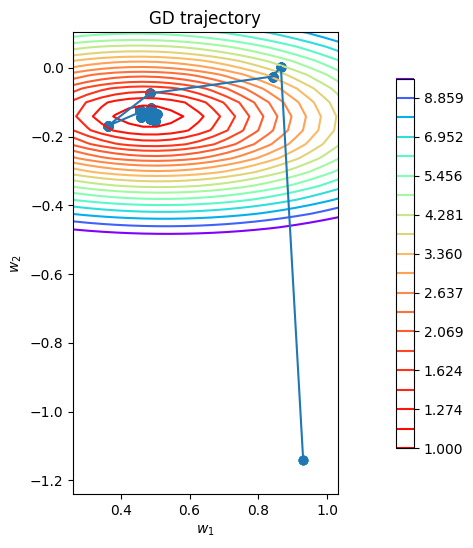

In [ ]:
# рисуем график
plot_gd(w_list, X, y, loss)

Траектория, конечно, у этого метода оптимизации хуже. Вероятно, потому что много случайностей: выбираем случаную точку, со случайной вероятностью сохраняем предыдущую точку... Но видно, что мы все равно дошли до минимума!

In [ ]:
# чуть-чуть переопределяем функцию для линейной регресси (вместо градиента считаем новую функцию)
class LinearRegression_sa:
    def __init__(self, loss: BaseLoss, t: int = 3) -> None:
        self.loss = loss
        self.t = t

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # задаем количество признаков
        n_features = X.shape[1]
        # создаем случайные начальные веса
        w_init = np.random.uniform(-2, 2, (n_features))
        # считаем НОВУЮ ФУНКЦИЮ
        grad = simulated_annealing(w_init, X, y, self.loss, self.t)
        # записываем финальные веса
        w_last = grad[-1]

        self.w = w_last

        # return w_last
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # получаем "предсказания" по нашим весам и выборке
        pred = np.dot(X, self.w)

        return pred

In [ ]:
# создаем регрессию на мсе, обучиваем ее
linear_regression = LinearRegression_sa(MSELoss())

In [ ]:
linear_regression.fit(X_train, y_train)

In [ ]:
# считаем ошибки
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2065522.0594846045
Ошибка на тестовой выборке: 5174649.488489858


Было:

Ошибка на обучающей выборке: 2062659.387204011

Ошибка на тестовой выборке: 5127921.847660164

Стало:

Ошибка на обучающей выборке: 2065522.0594846045

Ошибка на тестовой выборке: 5174649.488489858

В целом как будто даже не очень сильно все ухудшилось -- всего на 3000 на трейновой и на 50000 на тестовой. Особенно неплохой результат, если считать, что действительно много случайностей. Также, как мне кажется, немного дольше работал, это тоже минус. Возможно, если поменять параметры распределения, то можно добиться еще большего улучшения результата!

In [ ]:
linear_regression = LinearRegression_sa(MSELoss(), t=4)

In [ ]:
linear_regression.fit(X_train, y_train)

In [ ]:
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2067423.8856877463
Ошибка на тестовой выборке: 5148264.986274764


При t=4 на тестовой чуть уменьшилась ошибка. На трейновой заметно небольшое увеличение. Но в целом все равно неплохо!

In [ ]:
linear_regression = LinearRegression_sa(MSELoss(), t=5)

In [ ]:
linear_regression.fit(X_train, y_train)

In [ ]:
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)

print(f'Ошибка на обучающей выборке: {mean_squared_error(y_pred_train, y_train)}')
print(f'Ошибка на тестовой выборке: {mean_squared_error(y_pred_test, y_test)}')

Ошибка на обучающей выборке: 2068577.8273191776
Ошибка на тестовой выборке: 5288065.093923885


При t=5 уже больше заметно переобучение: слишком подскочила ошибка на тестовой выборке. Видимо, оптимальным будет параметр, равный четырем, потому что получаются наиболее близкие к обычным результатам.